In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision.transforms as tfms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
EPOCHS = 300
BATCH_SIZE = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
# trainset = dsets.FashionMNIST(
#     root='./data/', 
#     train=True, 
#     transform=tfms.Compose([
#         tfms.ToTensor(),
#         tfms.Normalize([0.5,], [0.5,])
#     ]),
#     download=True
# )
trainset = dsets.MNIST(
    root='./data/', 
    train=True, 
    transform=tfms.Compose([
        tfms.ToTensor(),
        tfms.Normalize([0.5,], [0.5,])
    ]),
    download=True
)

In [4]:
data_loader = torch.utils.data.DataLoader(
    dataset = trainset,
    batch_size = BATCH_SIZE, 
    shuffle = True
)

In [5]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        self.embed = nn.Embedding(10, 10)
        self.model = nn.Sequential(
            nn.Linear(110, 256),
            nn.LeakyReLU(0.2, True),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, True),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, True),
            nn.Linear(1024, 784),
            nn.Tanh()
        )
        
    def forward(self, z, labels):
        c = self.embed(labels)
        x = torch.cat([z, c], 1)
        return self.model(x)

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.embed = nn.Embedding(10, 10)
        
        self.model = nn.Sequential(
            nn.Linear(794, 1024),
            nn.LeakyReLU(0.2, True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x, label):
        c = self.embed(label)
        x = torch.cat([x, c], dim=1)
        return self.model(x)

In [7]:
D = Discriminator().to(device)
G = Generator().to(device)

criterion = nn.BCELoss()
d_optim = optim.Adam(D.parameters(), lr=0.0002)
g_optim = optim.Adam(G.parameters(), lr=0.0002)

In [8]:
from torchsummaryM import summary

test_z = torch.zeros((64, 784)).float().to(device)
test_label = torch.zeros((64, )).long().to(device)

d = summary(D, test_z, test_label)

----------------------------------------------------------------------------------------------
Layer(type)                       ||        Kernel Shape         Output Shape         Param #
Discriminator Inputs              ||                   -            [64, 784]               -
                                  ||                   -                 [64]               -
                                  ||                                                         
01> Discriminator-Embedding       ||            [10, 10]             [64, 10]             100
02> Discriminator-Model-Linear    ||         [794, 1024]           [64, 1024]         814,080
03> Discriminator-Model-LeakyReLU ||                   -           [64, 1024]               0
04> Discriminator-Model-Dropout   ||                   -           [64, 1024]               0
05> Discriminator-Model-Linear    ||         [1024, 512]            [64, 512]         524,800
06> Discriminator-Model-LeakyReLU ||                   -   

In [9]:
test_z = torch.zeros((64, 100)).float().to(device)
test_label = torch.zeros((64, )).long().to(device)

g = summary(G, test_z, test_label)

------------------------------------------------------------------------------------------
Layer(type)                   ||        Kernel Shape         Output Shape         Param #
Generator Inputs              ||                   -            [64, 100]               -
                              ||                   -                 [64]               -
                              ||                                                         
01> Generator-Embedding       ||            [10, 10]             [64, 10]             100
02> Generator-Model-Linear    ||          [110, 256]            [64, 256]          28,416
03> Generator-Model-LeakyReLU ||                   -            [64, 256]               0
04> Generator-Model-Linear    ||          [256, 512]            [64, 512]         131,584
05> Generator-Model-LeakyReLU ||                   -            [64, 512]               0
06> Generator-Model-Linear    ||         [512, 1024]           [64, 1024]         525,312
07> Gener

In [10]:
nums = [x for x in range(10)]
test_nums = []
for i in range(10):
    test_nums += nums
plot_label = torch.tensor(test_nums, dtype=torch.long).to(device)

Epoch [  0|300]    Loss [D:1.603818 | G:0.827547]    [D(x)  0.645417| D(G(z)) 0.614018]


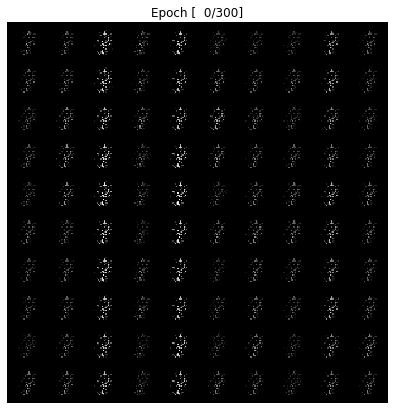

Epoch [  1|300]    Loss [D:0.292857 | G:3.347395]    [D(x)  0.903499| D(G(z)) 0.157247]
Epoch [  2|300]    Loss [D:0.739113 | G:1.960956]    [D(x)  0.800315| D(G(z)) 0.316774]
Epoch [  3|300]    Loss [D:0.252949 | G:3.524518]    [D(x)  0.920297| D(G(z)) 0.091792]
Epoch [  4|300]    Loss [D:0.288404 | G:3.036757]    [D(x)  0.894961| D(G(z)) 0.095071]
Epoch [  5|300]    Loss [D:0.375779 | G:2.770278]    [D(x)  0.865393| D(G(z)) 0.107158]
Epoch [  6|300]    Loss [D:0.302838 | G:2.715203]    [D(x)  0.905526| D(G(z)) 0.133103]
Epoch [  7|300]    Loss [D:0.680111 | G:2.862802]    [D(x)  0.752202| D(G(z)) 0.146998]
Epoch [  8|300]    Loss [D:0.783433 | G:2.320372]    [D(x)  0.799997| D(G(z)) 0.264810]
Epoch [  9|300]    Loss [D:0.374895 | G:2.814507]    [D(x)  0.883721| D(G(z)) 0.134118]
Epoch [ 10|300]    Loss [D:0.565387 | G:2.286313]    [D(x)  0.832500| D(G(z)) 0.194509]
Epoch [ 11|300]    Loss [D:0.616914 | G:2.634188]    [D(x)  0.790828| D(G(z)) 0.172207]
Epoch [ 12|300]    Loss [D:0.809

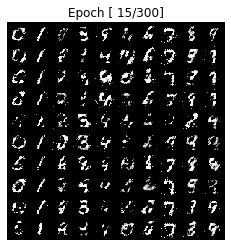

Epoch [ 16|300]    Loss [D:0.797897 | G:1.614832]    [D(x)  0.736571| D(G(z)) 0.307785]
Epoch [ 17|300]    Loss [D:0.898929 | G:1.515689]    [D(x)  0.708772| D(G(z)) 0.296739]
Epoch [ 18|300]    Loss [D:0.906862 | G:1.683256]    [D(x)  0.645917| D(G(z)) 0.242889]
Epoch [ 19|300]    Loss [D:0.756079 | G:1.714749]    [D(x)  0.747540| D(G(z)) 0.278543]
Epoch [ 20|300]    Loss [D:1.088209 | G:1.280123]    [D(x)  0.617843| D(G(z)) 0.326694]
Epoch [ 21|300]    Loss [D:1.009186 | G:1.445171]    [D(x)  0.739084| D(G(z)) 0.381793]
Epoch [ 22|300]    Loss [D:1.159231 | G:1.774494]    [D(x)  0.637907| D(G(z)) 0.276015]
Epoch [ 23|300]    Loss [D:1.054979 | G:1.255867]    [D(x)  0.696647| D(G(z)) 0.383132]
Epoch [ 24|300]    Loss [D:1.084403 | G:1.413104]    [D(x)  0.620205| D(G(z)) 0.330094]
Epoch [ 25|300]    Loss [D:0.907321 | G:1.207394]    [D(x)  0.690810| D(G(z)) 0.347200]
Epoch [ 26|300]    Loss [D:1.116727 | G:1.410200]    [D(x)  0.643374| D(G(z)) 0.357484]
Epoch [ 27|300]    Loss [D:1.062

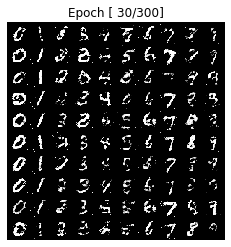

Epoch [ 31|300]    Loss [D:1.004132 | G:1.219016]    [D(x)  0.691785| D(G(z)) 0.374682]
Epoch [ 32|300]    Loss [D:0.912710 | G:1.337863]    [D(x)  0.691585| D(G(z)) 0.329230]
Epoch [ 33|300]    Loss [D:1.085450 | G:1.079508]    [D(x)  0.664684| D(G(z)) 0.388083]
Epoch [ 34|300]    Loss [D:1.063453 | G:1.101246]    [D(x)  0.632593| D(G(z)) 0.369374]
Epoch [ 35|300]    Loss [D:1.058781 | G:1.148915]    [D(x)  0.596010| D(G(z)) 0.342093]
Epoch [ 36|300]    Loss [D:1.103707 | G:1.141457]    [D(x)  0.600775| D(G(z)) 0.364084]
Epoch [ 37|300]    Loss [D:1.024007 | G:1.456142]    [D(x)  0.680768| D(G(z)) 0.364229]
Epoch [ 38|300]    Loss [D:1.190033 | G:1.221464]    [D(x)  0.624319| D(G(z)) 0.399799]
Epoch [ 39|300]    Loss [D:1.195036 | G:1.082521]    [D(x)  0.586053| D(G(z)) 0.399338]
Epoch [ 40|300]    Loss [D:0.998983 | G:1.225898]    [D(x)  0.622376| D(G(z)) 0.342510]
Epoch [ 41|300]    Loss [D:1.192959 | G:0.924258]    [D(x)  0.554565| D(G(z)) 0.390481]
Epoch [ 42|300]    Loss [D:1.081

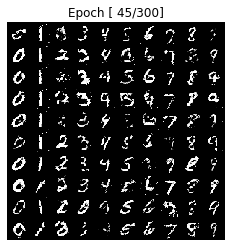

Epoch [ 46|300]    Loss [D:1.048023 | G:1.421239]    [D(x)  0.637758| D(G(z)) 0.372813]
Epoch [ 47|300]    Loss [D:1.166741 | G:1.030849]    [D(x)  0.590971| D(G(z)) 0.408563]
Epoch [ 48|300]    Loss [D:1.140368 | G:0.962342]    [D(x)  0.586425| D(G(z)) 0.406519]
Epoch [ 49|300]    Loss [D:1.197937 | G:1.033361]    [D(x)  0.560907| D(G(z)) 0.403436]
Epoch [ 50|300]    Loss [D:1.151472 | G:1.096696]    [D(x)  0.582094| D(G(z)) 0.391764]
Epoch [ 51|300]    Loss [D:1.382508 | G:1.070878]    [D(x)  0.591129| D(G(z)) 0.464718]
Epoch [ 52|300]    Loss [D:1.255467 | G:0.920784]    [D(x)  0.565999| D(G(z)) 0.448205]
Epoch [ 53|300]    Loss [D:1.087908 | G:1.190235]    [D(x)  0.568479| D(G(z)) 0.323204]
Epoch [ 54|300]    Loss [D:1.206527 | G:1.189221]    [D(x)  0.546153| D(G(z)) 0.378796]
Epoch [ 55|300]    Loss [D:1.252598 | G:0.951418]    [D(x)  0.552117| D(G(z)) 0.435027]
Epoch [ 56|300]    Loss [D:1.263425 | G:0.920309]    [D(x)  0.554278| D(G(z)) 0.429325]
Epoch [ 57|300]    Loss [D:1.199

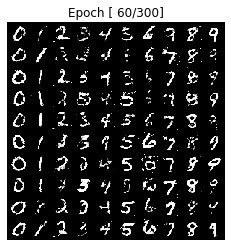

Epoch [ 61|300]    Loss [D:1.131626 | G:1.032053]    [D(x)  0.599943| D(G(z)) 0.405302]
Epoch [ 62|300]    Loss [D:1.205973 | G:0.910670]    [D(x)  0.600689| D(G(z)) 0.445999]
Epoch [ 63|300]    Loss [D:1.033421 | G:1.284565]    [D(x)  0.615315| D(G(z)) 0.336112]
Epoch [ 64|300]    Loss [D:1.319952 | G:0.886419]    [D(x)  0.546497| D(G(z)) 0.434013]
Epoch [ 65|300]    Loss [D:1.213680 | G:0.919374]    [D(x)  0.591522| D(G(z)) 0.455963]
Epoch [ 66|300]    Loss [D:1.207209 | G:1.160871]    [D(x)  0.510597| D(G(z)) 0.365522]
Epoch [ 67|300]    Loss [D:1.226537 | G:0.828214]    [D(x)  0.583814| D(G(z)) 0.461214]
Epoch [ 68|300]    Loss [D:1.344424 | G:0.862230]    [D(x)  0.530124| D(G(z)) 0.458642]
Epoch [ 69|300]    Loss [D:1.222406 | G:0.883968]    [D(x)  0.581006| D(G(z)) 0.447411]
Epoch [ 70|300]    Loss [D:1.132706 | G:0.964222]    [D(x)  0.570891| D(G(z)) 0.404123]
Epoch [ 71|300]    Loss [D:1.250650 | G:0.982442]    [D(x)  0.546290| D(G(z)) 0.433866]
Epoch [ 72|300]    Loss [D:1.101

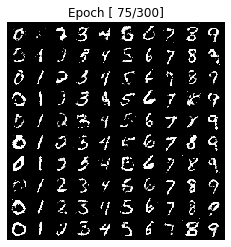

Epoch [ 76|300]    Loss [D:1.271673 | G:0.820363]    [D(x)  0.552461| D(G(z)) 0.453315]
Epoch [ 77|300]    Loss [D:1.250624 | G:0.940185]    [D(x)  0.534844| D(G(z)) 0.424663]
Epoch [ 78|300]    Loss [D:1.285840 | G:0.935124]    [D(x)  0.583248| D(G(z)) 0.466702]
Epoch [ 79|300]    Loss [D:1.274598 | G:0.848177]    [D(x)  0.523579| D(G(z)) 0.444522]
Epoch [ 80|300]    Loss [D:1.284879 | G:0.846734]    [D(x)  0.551935| D(G(z)) 0.453405]
Epoch [ 81|300]    Loss [D:1.314388 | G:0.845046]    [D(x)  0.547805| D(G(z)) 0.450540]
Epoch [ 82|300]    Loss [D:1.297528 | G:0.823689]    [D(x)  0.563359| D(G(z)) 0.474138]
Epoch [ 83|300]    Loss [D:1.397758 | G:0.846190]    [D(x)  0.515852| D(G(z)) 0.470195]
Epoch [ 84|300]    Loss [D:1.357118 | G:0.773380]    [D(x)  0.510439| D(G(z)) 0.466986]
Epoch [ 85|300]    Loss [D:1.301327 | G:0.826134]    [D(x)  0.558357| D(G(z)) 0.479905]
Epoch [ 86|300]    Loss [D:1.255699 | G:0.798808]    [D(x)  0.560850| D(G(z)) 0.466117]
Epoch [ 87|300]    Loss [D:1.142

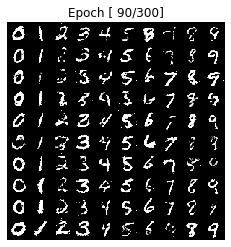

Epoch [ 91|300]    Loss [D:1.185902 | G:0.921076]    [D(x)  0.552036| D(G(z)) 0.415505]
Epoch [ 92|300]    Loss [D:1.362378 | G:0.811140]    [D(x)  0.528566| D(G(z)) 0.478570]
Epoch [ 93|300]    Loss [D:1.260628 | G:0.857887]    [D(x)  0.557807| D(G(z)) 0.454424]
Epoch [ 94|300]    Loss [D:1.265768 | G:0.801547]    [D(x)  0.566091| D(G(z)) 0.471505]
Epoch [ 95|300]    Loss [D:1.335953 | G:0.890577]    [D(x)  0.524688| D(G(z)) 0.432393]
Epoch [ 96|300]    Loss [D:1.285190 | G:0.794504]    [D(x)  0.548334| D(G(z)) 0.469510]
Epoch [ 97|300]    Loss [D:1.329961 | G:0.917044]    [D(x)  0.496768| D(G(z)) 0.428051]
Epoch [ 98|300]    Loss [D:1.254333 | G:0.953126]    [D(x)  0.557756| D(G(z)) 0.418579]
Epoch [ 99|300]    Loss [D:1.335436 | G:0.902451]    [D(x)  0.557071| D(G(z)) 0.466332]
Epoch [100|300]    Loss [D:1.307274 | G:0.933161]    [D(x)  0.543768| D(G(z)) 0.448030]
Epoch [101|300]    Loss [D:1.333752 | G:0.821738]    [D(x)  0.523773| D(G(z)) 0.461660]
Epoch [102|300]    Loss [D:1.368

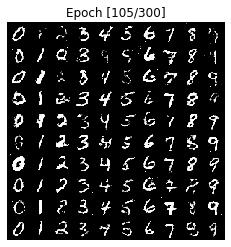

Epoch [106|300]    Loss [D:1.279943 | G:0.981510]    [D(x)  0.566544| D(G(z)) 0.437158]
Epoch [107|300]    Loss [D:1.306693 | G:0.904095]    [D(x)  0.533263| D(G(z)) 0.447525]
Epoch [108|300]    Loss [D:1.261004 | G:0.793489]    [D(x)  0.568232| D(G(z)) 0.476087]
Epoch [109|300]    Loss [D:1.224094 | G:0.851769]    [D(x)  0.573003| D(G(z)) 0.451396]
Epoch [110|300]    Loss [D:1.285305 | G:0.815388]    [D(x)  0.548034| D(G(z)) 0.470904]
Epoch [111|300]    Loss [D:1.365912 | G:0.779272]    [D(x)  0.532382| D(G(z)) 0.483931]
Epoch [112|300]    Loss [D:1.347042 | G:0.820405]    [D(x)  0.516984| D(G(z)) 0.462548]
Epoch [113|300]    Loss [D:1.284369 | G:0.902890]    [D(x)  0.563209| D(G(z)) 0.467511]
Epoch [114|300]    Loss [D:1.248427 | G:0.862958]    [D(x)  0.568174| D(G(z)) 0.440967]
Epoch [115|300]    Loss [D:1.235176 | G:0.814868]    [D(x)  0.578956| D(G(z)) 0.472777]
Epoch [116|300]    Loss [D:1.364637 | G:0.839177]    [D(x)  0.525386| D(G(z)) 0.474038]
Epoch [117|300]    Loss [D:1.322

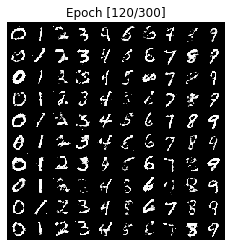

Epoch [121|300]    Loss [D:1.299436 | G:0.903757]    [D(x)  0.540957| D(G(z)) 0.456054]
Epoch [122|300]    Loss [D:1.347388 | G:0.834408]    [D(x)  0.553424| D(G(z)) 0.473655]
Epoch [123|300]    Loss [D:1.347869 | G:0.730058]    [D(x)  0.535006| D(G(z)) 0.494135]
Epoch [124|300]    Loss [D:1.280419 | G:0.816368]    [D(x)  0.553977| D(G(z)) 0.454575]
Epoch [125|300]    Loss [D:1.313439 | G:0.807459]    [D(x)  0.535656| D(G(z)) 0.465766]
Epoch [126|300]    Loss [D:1.387559 | G:0.856962]    [D(x)  0.523610| D(G(z)) 0.463542]
Epoch [127|300]    Loss [D:1.337900 | G:0.799038]    [D(x)  0.547023| D(G(z)) 0.493593]
Epoch [128|300]    Loss [D:1.298784 | G:0.751973]    [D(x)  0.550562| D(G(z)) 0.482506]
Epoch [129|300]    Loss [D:1.305239 | G:0.846424]    [D(x)  0.551249| D(G(z)) 0.474309]
Epoch [130|300]    Loss [D:1.282865 | G:0.786160]    [D(x)  0.537479| D(G(z)) 0.466589]
Epoch [131|300]    Loss [D:1.256817 | G:0.955612]    [D(x)  0.545367| D(G(z)) 0.431842]
Epoch [132|300]    Loss [D:1.291

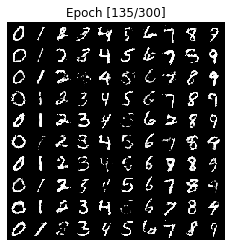

Epoch [136|300]    Loss [D:1.272868 | G:0.807272]    [D(x)  0.522824| D(G(z)) 0.439009]
Epoch [137|300]    Loss [D:1.314337 | G:0.767119]    [D(x)  0.550751| D(G(z)) 0.483692]
Epoch [138|300]    Loss [D:1.294802 | G:0.775185]    [D(x)  0.549294| D(G(z)) 0.479575]
Epoch [139|300]    Loss [D:1.371252 | G:0.803923]    [D(x)  0.545175| D(G(z)) 0.487619]
Epoch [140|300]    Loss [D:1.309706 | G:0.823013]    [D(x)  0.528942| D(G(z)) 0.461824]
Epoch [141|300]    Loss [D:1.270253 | G:0.685119]    [D(x)  0.586393| D(G(z)) 0.493722]
Epoch [142|300]    Loss [D:1.377028 | G:0.746312]    [D(x)  0.498879| D(G(z)) 0.470736]
Epoch [143|300]    Loss [D:1.293791 | G:0.805797]    [D(x)  0.556613| D(G(z)) 0.468124]
Epoch [144|300]    Loss [D:1.276203 | G:0.949792]    [D(x)  0.495569| D(G(z)) 0.397753]
Epoch [145|300]    Loss [D:1.283241 | G:0.809269]    [D(x)  0.560525| D(G(z)) 0.472131]
Epoch [146|300]    Loss [D:1.285048 | G:0.870196]    [D(x)  0.554115| D(G(z)) 0.457470]
Epoch [147|300]    Loss [D:1.331

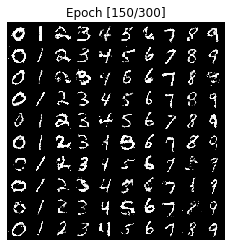

Epoch [151|300]    Loss [D:1.364103 | G:0.752556]    [D(x)  0.518787| D(G(z)) 0.481576]
Epoch [152|300]    Loss [D:1.357517 | G:0.792484]    [D(x)  0.526345| D(G(z)) 0.472585]
Epoch [153|300]    Loss [D:1.315217 | G:0.813713]    [D(x)  0.538082| D(G(z)) 0.482671]
Epoch [154|300]    Loss [D:1.309981 | G:0.769235]    [D(x)  0.534519| D(G(z)) 0.462825]
Epoch [155|300]    Loss [D:1.339554 | G:0.837966]    [D(x)  0.537107| D(G(z)) 0.469981]
Epoch [156|300]    Loss [D:1.250247 | G:0.811290]    [D(x)  0.547720| D(G(z)) 0.442093]
Epoch [157|300]    Loss [D:1.396768 | G:0.949993]    [D(x)  0.489214| D(G(z)) 0.432361]
Epoch [158|300]    Loss [D:1.348757 | G:0.839913]    [D(x)  0.534792| D(G(z)) 0.462378]
Epoch [159|300]    Loss [D:1.351093 | G:0.812298]    [D(x)  0.517374| D(G(z)) 0.468604]
Epoch [160|300]    Loss [D:1.305211 | G:0.829549]    [D(x)  0.514435| D(G(z)) 0.447690]
Epoch [161|300]    Loss [D:1.305354 | G:0.783468]    [D(x)  0.524064| D(G(z)) 0.465867]
Epoch [162|300]    Loss [D:1.271

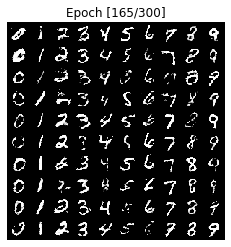

Epoch [166|300]    Loss [D:1.368380 | G:0.801968]    [D(x)  0.507209| D(G(z)) 0.470858]
Epoch [167|300]    Loss [D:1.321734 | G:0.880615]    [D(x)  0.528321| D(G(z)) 0.447119]
Epoch [168|300]    Loss [D:1.282739 | G:0.818207]    [D(x)  0.538924| D(G(z)) 0.459972]
Epoch [169|300]    Loss [D:1.348306 | G:0.786687]    [D(x)  0.518507| D(G(z)) 0.472614]
Epoch [170|300]    Loss [D:1.355889 | G:0.903572]    [D(x)  0.496403| D(G(z)) 0.431438]
Epoch [171|300]    Loss [D:1.424175 | G:0.727852]    [D(x)  0.502758| D(G(z)) 0.501939]
Epoch [172|300]    Loss [D:1.416883 | G:0.718404]    [D(x)  0.496390| D(G(z)) 0.494156]
Epoch [173|300]    Loss [D:1.417580 | G:0.735151]    [D(x)  0.507465| D(G(z)) 0.498911]
Epoch [174|300]    Loss [D:1.258122 | G:0.852641]    [D(x)  0.563634| D(G(z)) 0.463860]
Epoch [175|300]    Loss [D:1.389193 | G:0.666305]    [D(x)  0.541805| D(G(z)) 0.527105]
Epoch [176|300]    Loss [D:1.320430 | G:0.913786]    [D(x)  0.492086| D(G(z)) 0.409932]
Epoch [177|300]    Loss [D:1.309

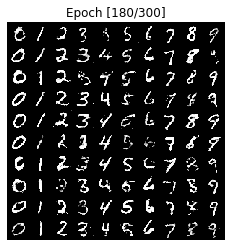

Epoch [181|300]    Loss [D:1.326975 | G:0.798993]    [D(x)  0.511842| D(G(z)) 0.465299]
Epoch [182|300]    Loss [D:1.283936 | G:0.829460]    [D(x)  0.541255| D(G(z)) 0.453279]
Epoch [183|300]    Loss [D:1.332976 | G:0.788810]    [D(x)  0.558295| D(G(z)) 0.492695]
Epoch [184|300]    Loss [D:1.390155 | G:0.751454]    [D(x)  0.516647| D(G(z)) 0.494563]
Epoch [185|300]    Loss [D:1.374014 | G:0.701962]    [D(x)  0.520698| D(G(z)) 0.500546]
Epoch [186|300]    Loss [D:1.333192 | G:0.749208]    [D(x)  0.531655| D(G(z)) 0.491363]
Epoch [187|300]    Loss [D:1.525022 | G:0.788131]    [D(x)  0.489441| D(G(z)) 0.501194]
Epoch [188|300]    Loss [D:1.291453 | G:0.787167]    [D(x)  0.552726| D(G(z)) 0.472020]
Epoch [189|300]    Loss [D:1.345055 | G:0.805601]    [D(x)  0.557311| D(G(z)) 0.492993]
Epoch [190|300]    Loss [D:1.343691 | G:0.860592]    [D(x)  0.524340| D(G(z)) 0.463477]
Epoch [191|300]    Loss [D:1.335344 | G:0.781694]    [D(x)  0.540073| D(G(z)) 0.483872]
Epoch [192|300]    Loss [D:1.291

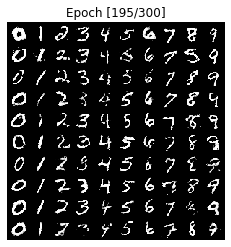

Epoch [196|300]    Loss [D:1.348350 | G:0.781720]    [D(x)  0.499309| D(G(z)) 0.458666]
Epoch [197|300]    Loss [D:1.359289 | G:0.781106]    [D(x)  0.524737| D(G(z)) 0.483003]
Epoch [198|300]    Loss [D:1.282031 | G:0.770872]    [D(x)  0.577725| D(G(z)) 0.482087]
Epoch [199|300]    Loss [D:1.416784 | G:0.836713]    [D(x)  0.525535| D(G(z)) 0.478559]
Epoch [200|300]    Loss [D:1.292625 | G:0.809417]    [D(x)  0.550906| D(G(z)) 0.461354]
Epoch [201|300]    Loss [D:1.265612 | G:0.911295]    [D(x)  0.542494| D(G(z)) 0.440963]
Epoch [202|300]    Loss [D:1.356485 | G:0.761770]    [D(x)  0.551679| D(G(z)) 0.471299]
Epoch [203|300]    Loss [D:1.346705 | G:0.824211]    [D(x)  0.514661| D(G(z)) 0.462248]
Epoch [204|300]    Loss [D:1.346351 | G:0.735888]    [D(x)  0.507107| D(G(z)) 0.472648]
Epoch [205|300]    Loss [D:1.291676 | G:0.778605]    [D(x)  0.528447| D(G(z)) 0.463144]
Epoch [206|300]    Loss [D:1.299087 | G:0.821932]    [D(x)  0.544606| D(G(z)) 0.469177]
Epoch [207|300]    Loss [D:1.347

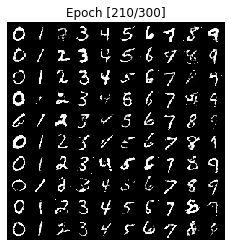

Epoch [211|300]    Loss [D:1.370417 | G:0.794691]    [D(x)  0.512366| D(G(z)) 0.472493]
Epoch [212|300]    Loss [D:1.436659 | G:0.741981]    [D(x)  0.516032| D(G(z)) 0.499533]
Epoch [213|300]    Loss [D:1.336984 | G:0.688535]    [D(x)  0.542216| D(G(z)) 0.495934]
Epoch [214|300]    Loss [D:1.393559 | G:0.718172]    [D(x)  0.543544| D(G(z)) 0.499882]
Epoch [215|300]    Loss [D:1.313387 | G:0.799566]    [D(x)  0.522260| D(G(z)) 0.469937]
Epoch [216|300]    Loss [D:1.339619 | G:0.742201]    [D(x)  0.529675| D(G(z)) 0.484395]
Epoch [217|300]    Loss [D:1.268496 | G:0.826557]    [D(x)  0.551753| D(G(z)) 0.456851]
Epoch [218|300]    Loss [D:1.313405 | G:0.844868]    [D(x)  0.518174| D(G(z)) 0.450762]
Epoch [219|300]    Loss [D:1.257779 | G:0.793822]    [D(x)  0.563910| D(G(z)) 0.471119]
Epoch [220|300]    Loss [D:1.215575 | G:0.779476]    [D(x)  0.567064| D(G(z)) 0.453403]
Epoch [221|300]    Loss [D:1.339488 | G:0.757307]    [D(x)  0.513884| D(G(z)) 0.478978]
Epoch [222|300]    Loss [D:1.330

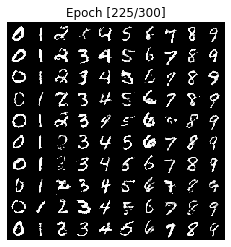

Epoch [226|300]    Loss [D:1.312405 | G:0.817381]    [D(x)  0.515099| D(G(z)) 0.444688]
Epoch [227|300]    Loss [D:1.324327 | G:0.775152]    [D(x)  0.530907| D(G(z)) 0.475041]
Epoch [228|300]    Loss [D:1.363602 | G:0.789423]    [D(x)  0.487745| D(G(z)) 0.455899]
Epoch [229|300]    Loss [D:1.381806 | G:0.713605]    [D(x)  0.517249| D(G(z)) 0.495779]
Epoch [230|300]    Loss [D:1.333159 | G:0.803563]    [D(x)  0.539733| D(G(z)) 0.473975]
Epoch [231|300]    Loss [D:1.328160 | G:0.811277]    [D(x)  0.530654| D(G(z)) 0.468468]
Epoch [232|300]    Loss [D:1.322393 | G:0.743561]    [D(x)  0.528379| D(G(z)) 0.477490]
Epoch [233|300]    Loss [D:1.369596 | G:0.780545]    [D(x)  0.527502| D(G(z)) 0.485505]
Epoch [234|300]    Loss [D:1.449522 | G:0.805963]    [D(x)  0.523179| D(G(z)) 0.490534]
Epoch [235|300]    Loss [D:1.324779 | G:0.773870]    [D(x)  0.519038| D(G(z)) 0.455620]
Epoch [236|300]    Loss [D:1.380148 | G:0.775207]    [D(x)  0.514350| D(G(z)) 0.489578]
Epoch [237|300]    Loss [D:1.310

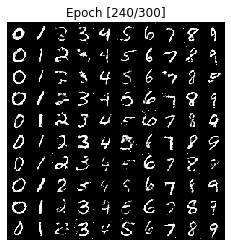

Epoch [241|300]    Loss [D:1.387251 | G:0.742996]    [D(x)  0.514644| D(G(z)) 0.485325]
Epoch [242|300]    Loss [D:1.285228 | G:0.741271]    [D(x)  0.575426| D(G(z)) 0.493694]
Epoch [243|300]    Loss [D:1.398073 | G:0.764384]    [D(x)  0.478188| D(G(z)) 0.470908]
Epoch [244|300]    Loss [D:1.339667 | G:0.772111]    [D(x)  0.508838| D(G(z)) 0.461202]
Epoch [245|300]    Loss [D:1.318872 | G:0.753655]    [D(x)  0.550068| D(G(z)) 0.476548]
Epoch [246|300]    Loss [D:1.461343 | G:0.728041]    [D(x)  0.518446| D(G(z)) 0.507622]
Epoch [247|300]    Loss [D:1.344843 | G:0.774809]    [D(x)  0.521275| D(G(z)) 0.477555]
Epoch [248|300]    Loss [D:1.376626 | G:0.727128]    [D(x)  0.514858| D(G(z)) 0.497279]
Epoch [249|300]    Loss [D:1.292130 | G:0.879457]    [D(x)  0.500788| D(G(z)) 0.425325]
Epoch [250|300]    Loss [D:1.401698 | G:0.803259]    [D(x)  0.485088| D(G(z)) 0.462447]
Epoch [251|300]    Loss [D:1.321844 | G:0.847322]    [D(x)  0.518406| D(G(z)) 0.452460]
Epoch [252|300]    Loss [D:1.376

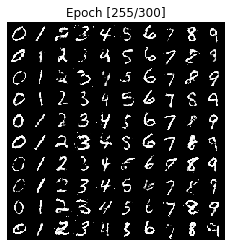

Epoch [256|300]    Loss [D:1.373678 | G:0.803667]    [D(x)  0.503032| D(G(z)) 0.471019]
Epoch [257|300]    Loss [D:1.310124 | G:0.844355]    [D(x)  0.519255| D(G(z)) 0.451884]
Epoch [258|300]    Loss [D:1.312932 | G:0.917507]    [D(x)  0.529066| D(G(z)) 0.457673]
Epoch [259|300]    Loss [D:1.390970 | G:0.846896]    [D(x)  0.507223| D(G(z)) 0.461377]
Epoch [260|300]    Loss [D:1.311085 | G:0.835745]    [D(x)  0.492430| D(G(z)) 0.433030]
Epoch [261|300]    Loss [D:1.339779 | G:0.798166]    [D(x)  0.507746| D(G(z)) 0.454371]
Epoch [262|300]    Loss [D:1.294829 | G:0.791965]    [D(x)  0.571550| D(G(z)) 0.482554]
Epoch [263|300]    Loss [D:1.372419 | G:0.787371]    [D(x)  0.515891| D(G(z)) 0.467497]
Epoch [264|300]    Loss [D:1.300245 | G:0.765723]    [D(x)  0.540036| D(G(z)) 0.476882]
Epoch [265|300]    Loss [D:1.359787 | G:0.733638]    [D(x)  0.536067| D(G(z)) 0.504787]
Epoch [266|300]    Loss [D:1.310686 | G:0.796080]    [D(x)  0.528395| D(G(z)) 0.463372]
Epoch [267|300]    Loss [D:1.278

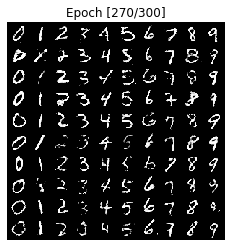

Epoch [271|300]    Loss [D:1.342197 | G:0.799074]    [D(x)  0.507044| D(G(z)) 0.471112]
Epoch [272|300]    Loss [D:1.416095 | G:0.761541]    [D(x)  0.523830| D(G(z)) 0.491756]
Epoch [273|300]    Loss [D:1.204137 | G:0.945126]    [D(x)  0.546061| D(G(z)) 0.416993]
Epoch [274|300]    Loss [D:1.326630 | G:0.786815]    [D(x)  0.563783| D(G(z)) 0.490400]
Epoch [275|300]    Loss [D:1.246284 | G:0.836904]    [D(x)  0.562176| D(G(z)) 0.457562]
Epoch [276|300]    Loss [D:1.370759 | G:0.767992]    [D(x)  0.495260| D(G(z)) 0.467847]
Epoch [277|300]    Loss [D:1.359111 | G:0.711119]    [D(x)  0.562692| D(G(z)) 0.519890]
Epoch [278|300]    Loss [D:1.338733 | G:0.720972]    [D(x)  0.539685| D(G(z)) 0.494007]
Epoch [279|300]    Loss [D:1.307367 | G:0.859535]    [D(x)  0.548044| D(G(z)) 0.449405]
Epoch [280|300]    Loss [D:1.260718 | G:0.841685]    [D(x)  0.537168| D(G(z)) 0.443781]
Epoch [281|300]    Loss [D:1.313624 | G:0.766012]    [D(x)  0.534676| D(G(z)) 0.475228]
Epoch [282|300]    Loss [D:1.279

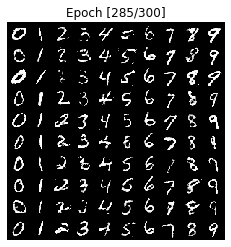

Epoch [286|300]    Loss [D:1.356084 | G:0.736099]    [D(x)  0.507444| D(G(z)) 0.482727]
Epoch [287|300]    Loss [D:1.357534 | G:0.737854]    [D(x)  0.518134| D(G(z)) 0.486981]
Epoch [288|300]    Loss [D:1.391239 | G:0.790131]    [D(x)  0.514592| D(G(z)) 0.487499]
Epoch [289|300]    Loss [D:1.387313 | G:0.711586]    [D(x)  0.520370| D(G(z)) 0.507728]
Epoch [290|300]    Loss [D:1.332643 | G:0.765157]    [D(x)  0.518457| D(G(z)) 0.467265]
Epoch [291|300]    Loss [D:1.280622 | G:0.829401]    [D(x)  0.560358| D(G(z)) 0.471799]
Epoch [292|300]    Loss [D:1.330461 | G:0.762046]    [D(x)  0.505207| D(G(z)) 0.457207]
Epoch [293|300]    Loss [D:1.348080 | G:0.768181]    [D(x)  0.517584| D(G(z)) 0.477917]
Epoch [294|300]    Loss [D:1.366708 | G:0.749900]    [D(x)  0.511024| D(G(z)) 0.478122]
Epoch [295|300]    Loss [D:1.335503 | G:0.794281]    [D(x)  0.528299| D(G(z)) 0.468537]
Epoch [296|300]    Loss [D:1.404650 | G:0.766462]    [D(x)  0.492607| D(G(z)) 0.478495]
Epoch [297|300]    Loss [D:1.346

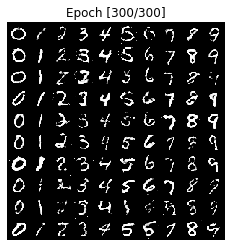

In [11]:
total_step = len(data_loader)

plt.ion()

for epoch in range(EPOCHS+1):
    for i, (images, labels) in enumerate(data_loader):
        images = images.reshape(BATCH_SIZE, -1).to(device)
        
        real_labels = torch.ones(BATCH_SIZE, 1).to(device)
        fake_labels = torch.zeros(BATCH_SIZE, 1).to(device)
        
        labels = labels.to(device)
        outputs = D(images, labels)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs
        
        z = torch.randn(BATCH_SIZE, 100).to(device)
        g_label = torch.randint(0, 10, (BATCH_SIZE, )).to(device)
        fake_image = G(z, g_label)
        
        outputs = D(fake_image, g_label)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs
        
        d_loss = d_loss_real + d_loss_fake
        
        d_optim.zero_grad()
        d_loss.backward()
        d_optim.step()
        
        fake_images = G(z, g_label)
        otuptus = D(fake_images, g_label)
        g_loss = criterion(otuptus, real_labels)
        
        g_optim.zero_grad()
        g_loss.backward()
        g_optim.step()  
        
    print("Epoch [{:3d}|{:3d}]    Loss [D:{:8.6f} | G:{:8.6f}]    [D(x)  {:8.6f}| D(G(z)) {:8.6f}]".format(
        epoch, EPOCHS, d_loss.item(), g_loss.item(), real_score.mean().item(), fake_score.mean().item()
    ))
    
    if epoch % 15 == 0:
        z = torch.randn(100, 100).to(device)
        sample_imgs = G(z, plot_label)
        sample_imgs = sample_imgs.reshape((100, 1, 28, 28))
        sample_imgs = torchvision.utils.make_grid(sample_imgs, nrow=10)
        plot_imgs   = np.clip(sample_imgs.data.cpu().numpy().transpose(1, 2, 0), 0, 1)

        plt.figure(figsize=(7, 7))
        plt.imshow(plot_imgs)
        plt.title("Epoch [{:3d}/{:3d}]".format(epoch, EPOCHS))
        plt.axis('off')
        plt.pause(0.001)
        
        torchvision.utils.save_image(sample_imgs, "./results/Epoch_{:3d}.png".format(epoch))
plt.ioff()

In [12]:
torch.save(G.state_dict(), "./models/generator.ptr")
torch.save(D.state_dict(), "./models/discriminator.ptr")